In [1]:
import seaborn

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from matplotlib import patches
import matplotlib.font_manager as font_manager

In [8]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rcParams['figure.figsize'] = [12, 8]


In [6]:
import pathlib

In [37]:
def imscatter(x, y, images, ax=None, zoom=1):
    x, y = np.atleast_1d(x, y)
    artists = []
    for i, items in enumerate(zip(x, y)):
        x0, y0 = items
        if ax is None:
            ax = plt.gca()
        try:
            image = plt.imread(images[i])
        except TypeError:
            # Likely already an array...
            pass
        im = OffsetImage(image, zoom=zoom)
        ab = AnnotationBbox(im, (x0+50, y0), xycoords = 'data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

In [202]:
names = ['britishgypsum', 'rockwool' ,'norbord', 'promat']

In [203]:
image_path = lambda name: pathlib.Path(f'imgs/{name}.png')

In [204]:
from PIL import Image

for n in names:
    img = Image.open(image_path(n))
    img = img.convert("RGBA")
    datas = img.getdata()

    newData = []
    for item in datas:
        if item[0] > 200 and item[1] > 200 and item[2] > 200:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)

    img.putdata(newData)
    img.save(f"imgs/{n}_2.png", "PNG")

In [205]:
names = [f'{n}_2' for n in names]

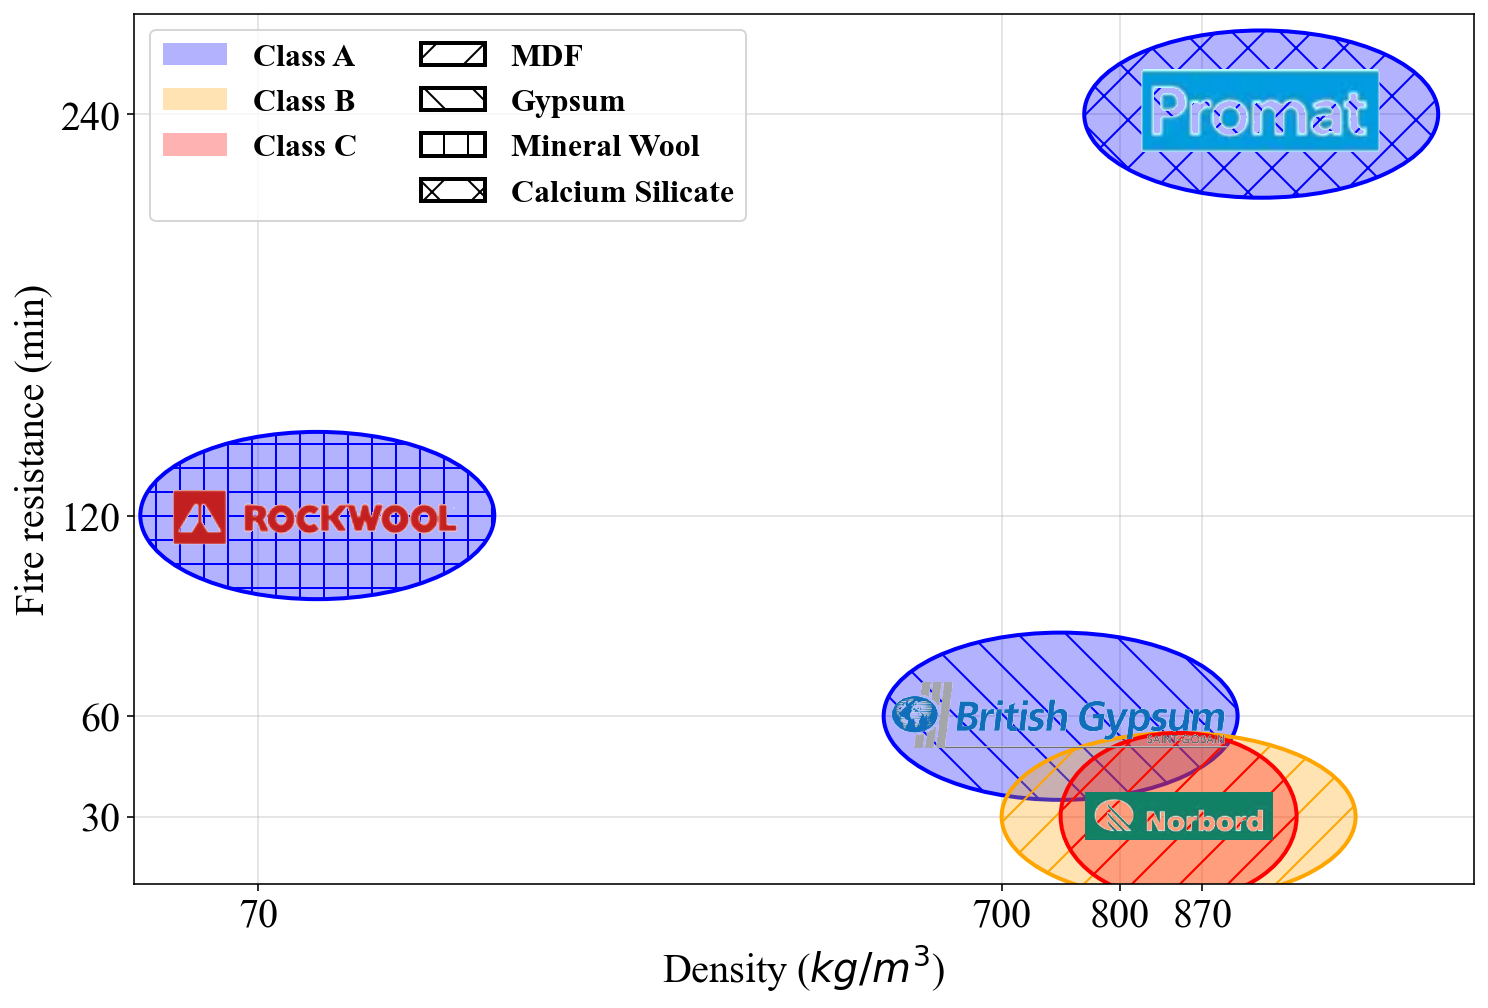

In [243]:
fig, ax = plt.subplots()

densities = [700, 70, 800, 870]
times = [60, 120, 30, 240]

array_image = [image_path(n) for n in names]

array_x = np.array(densities)
array_y = np.array(times)


imscatter(array_x, array_y, array_image, zoom = 0.35, ax = ax)

font = 'Times New Roman'

ax.set_ylabel('Fire resistance (min)', fontsize = 20, fontname = font)
ax.set_xlabel('Density ($kg/m^3$)', fontsize = 20, fontname = font)

ax.set_yticks(times)
ax.set_xticks(array_x)

for tick in ax.get_yticklabels():
    tick.set_fontname(font)
    tick.set_fontsize(20)
for tick in ax.get_xticklabels():
    tick.set_fontname(font)
    tick.set_fontsize(20)


ax.set_ylim(10, 270)
ax.set_xlim(-35, 1100)


    
#BRITISH GYPSUM
e1 = patches.Ellipse((array_x[0]+50, array_y[0]), width = 300, height = 50,
                     linewidth=2, fill = True, zorder = 2, facecolor = 'blue', alpha = 0.3)
ax.add_patch(e1)


e1 = patches.Ellipse((array_x[0]+50, array_y[0]), width = 300, height = 50, angle = 0, 
                     linewidth=2, fill = False, zorder = 2,
                    hatch = '\\', edgecolor = 'blue')
ax.add_patch(e1)


#ROCKWOOL
e1 = patches.Ellipse((array_x[1]+50, array_y[1]), width = 300, height = 50,
                     linewidth=2, fill = True, zorder = 2, facecolor = 'blue', alpha = 0.3, label = 'Class A')
ax.add_patch(e1)


e1 = patches.Ellipse((array_x[1]+50, array_y[1]), width = 300, height = 50, angle = 0, 
                     linewidth=2, fill = False, zorder = 2,
                    hatch = '+', edgecolor = 'blue')
ax.add_patch(e1)


#NORBORD
e1 = patches.Ellipse((array_x[2]+50, array_y[2]), width = 300, height = 50,
                     linewidth=2, fill = True, zorder = 2, facecolor = 'orange', alpha = 0.3, label = 'Class B')
ax.add_patch(e1)
e1 = patches.Ellipse((array_x[2]+50, array_y[2]), width = 300, height = 50, angle = 0, 
                     linewidth=2, fill = False, zorder = 2,
                    hatch = '/', edgecolor = 'orange')
ax.add_patch(e1)



e1 = patches.Ellipse((array_x[2]+50, array_y[2]), width = 200, height = 50, angle = 0, 
                     linewidth=2, fill = True, zorder = 2, facecolor = 'red', alpha = 0.3, label = 'Class C')
ax.add_patch(e1)

e1 = patches.Ellipse((array_x[2]+50, array_y[2]), width = 200, height = 50, angle = 0, 
                     linewidth=2, fill = False, zorder = 2,
                    hatch = '/', edgecolor = 'red')
ax.add_patch(e1)

#Promat
e1 = patches.Ellipse((array_x[3]+50, array_y[3]), width = 300, height = 50,
                     linewidth=2, fill = True, zorder = 2, facecolor = 'blue', alpha = 0.3)
ax.add_patch(e1)

e1 = patches.Ellipse((array_x[3]+50, array_y[3]), width = 300, height = 50, angle = 0, 
                     linewidth=2, fill = False, zorder = 2,
                    hatch = 'x', edgecolor = 'blue')
ax.add_patch(e1)



#########

e1 = patches.Ellipse((-10, -10), width = 10, height = 10, angle = 0, 
                     linewidth=2, fill = False, zorder = 2,
                    hatch = '', edgecolor = 'black', label = ' ', lw = 0)
ax.add_patch(e1)


e1 = patches.Ellipse((-10, -10), width = 10, height = 10, angle = 0, 
                     linewidth=2, fill = False, zorder = 2,
                    hatch = '/', edgecolor = 'black', label = 'MDF')
ax.add_patch(e1)


e1 = patches.Ellipse((-10, -10), width = 10, height = 10, angle = 0, 
                     linewidth=2, fill = False, zorder = 2,
                    hatch = '\\', edgecolor = 'black', label = 'Gypsum')
ax.add_patch(e1)



e1 = patches.Ellipse((-10, -10), width = 10, height = 10, angle = 0, 
                     linewidth=2, fill = False, zorder = 2,
                    hatch = '+', edgecolor = 'black', label = 'Mineral Wool')
ax.add_patch(e1)

e1 = patches.Ellipse((-10, -10), width = 10, height = 10, angle = 0, 
                     linewidth=2, fill = False, zorder = 2,
                    hatch = 'x', edgecolor = 'black', label = 'Calcium Silicate')
ax.add_patch(e1)






ax.grid(alpha = 0.4)

fontlegend = font_manager.FontProperties(family = font, style = 'normal', weight = 'bold', size = 16)
ax.legend(prop = fontlegend, loc = 'upper left', ncol = 2)

plt.savefig('imgs/landscape.png', dpi = 200, bbox_inches = 'tight')

plt.show()